In [15]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### Project Kickoff: Loading, Merging, Understanding ,Visualizing and Exploring the Dataset

> The dataset columns explanation is available in the file `dataset_columns_explanation.txt`

In [ ]:
train = pd.read_csv("train.csv")
store = pd.read_csv("store.csv")

train.head()
store.head()

print(train.shape)
print(store.shape)


# Merge datasets on 'Store' column
# 'left' join ensures that all rows from train are kept
# store info columns will be repeated for each corresponding Store in train
data = pd.merge(train, store, on='Store', how='left')
data.to_csv('merged_dataset_store+train.csv', index=False)

data.shape #(1017209, 18)


C:\Users\user\AppData\Local\Temp\ipykernel_14036\2705146461.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


(1017209, 9)
(1115, 10)


(1017209, 18)

In [ ]:
data2 = pd.read_csv('merged_dataset_store+train.csv')

print(data2.isnull().sum())
print(data2.isnull().sum().sum())

# Checking how many duplicate rows
print("Number of duplicate rows:", data.duplicated().sum())



C:\Users\user\AppData\Local\Temp\ipykernel_14036\2594696180.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data2 = pd.read_csv('merged_dataset_store+train.csv')


Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64
2173431
Number of duplicate rows: 0


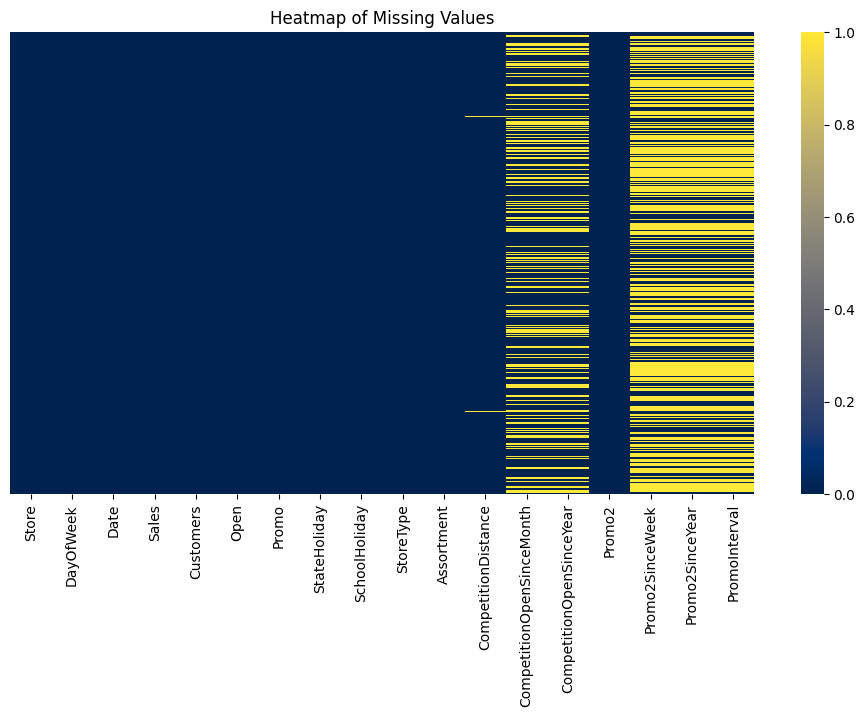

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(12,6))

sns.heatmap(data2.isnull(), cmap="cividis", cbar=True, yticklabels=False)

plt.title("Heatmap of Missing Values")
plt.show()

plt.savefig("images/heatmap_missing_values.png")

In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [25]:
print(data.dtypes)

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


In [26]:
# Summary statistics
print(data.describe())

              Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  CompetitionDistance  \
count  1.017209e+06   1.017209e+06         1.014567e+06   
mean   3.815145e-01   1.786467e-01         5.430086e+03   
std    4.857586e-01   3.830564e-01         7.715324e+03   
min    0.000000e+00   0.000000e+00         2.000000e

In [27]:
# checking unique values

categorical_cols = ['StoreType', 'Assortment', 'StateHoliday', 'Promo2', 'PromoInterval']
for col in categorical_cols:
    print(f"{col} unique values: {data[col].unique()}")


StoreType unique values: ['c' 'a' 'd' 'b']
Assortment unique values: ['a' 'c' 'b']
StateHoliday unique values: ['0' 'a' 'b' 'c' 0]
Promo2 unique values: [0 1]
PromoInterval unique values: [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
